<a href="https://colab.research.google.com/github/HuynPann511/MACHINE_LEARNING_HK241/blob/main/Practice_Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Pre-processing
data = pd.read_csv('/content/kmeans_dataset.csv', sep=';')
data = data.iloc[:, :6]
mean = data.mean()
std = data.std()

pos_data = data[
    (data >= mean - 3 * std) & (data <= mean + 3 * std)
].dropna()


# PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(pos_data)
scaler = StandardScaler()
data_pca_scaled = scaler.fit_transform(data_pca)
data_pca_df = pd.DataFrame(data_pca_scaled, columns=['PC1', 'PC2', 'PC3'])

# K-means clustering
def initialize_centroids(data, k):
    return data.sample(n=k).values

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data.values[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, max_iters=1000):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

def calculate_cost(data, labels, centroids):
    cost = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        cost += np.sum((cluster_points - centroids[i])**2)
    return cost

Cost function: 517.5891245301236


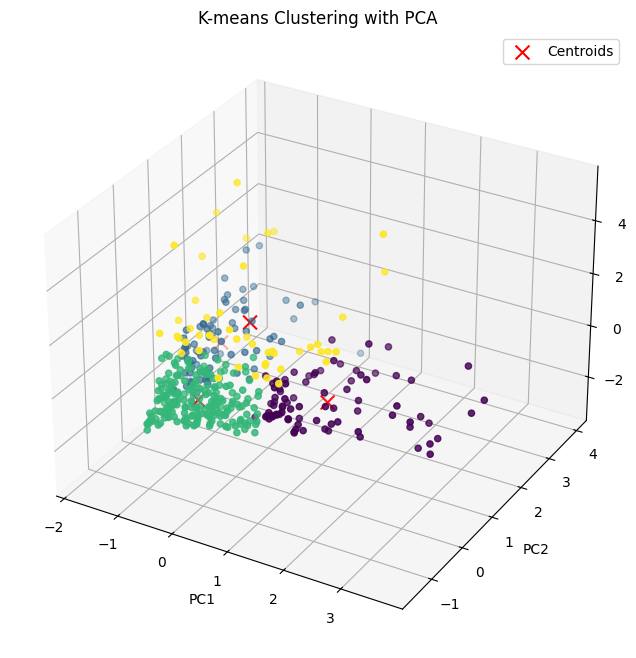

In [5]:
best_cost = float('inf')
best_labels = None
best_centroids = None
k = 4

for _ in range(100):
    labels, centroids = kmeans(data_pca_df, k)
    cost = calculate_cost(data_pca_df.values, labels, centroids)

    if cost < best_cost:
        best_cost = cost
        best_labels = labels
        best_centroids = centroids

print("Cost function:", best_cost)

# Results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_pca_df['PC1'], data_pca_df['PC2'], data_pca_df['PC3'], c=best_labels, cmap='viridis', marker='o')
ax.scatter(best_centroids[:, 0], best_centroids[:, 1], best_centroids[:, 2], color='red', marker='x', s=100, label='Centroids')

ax.set_title("K-means Clustering with PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()